In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_csv("abalone.csv")
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# Checking Null values

In [4]:
#Checking Null Values
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [5]:
# Target Variable
data['age'] = data.Rings + 1.5
data.drop('Rings', axis=1, inplace=True)
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [6]:
data.shape

(4177, 9)

In [7]:
# Unique Values
data.nunique().to_frame("unique values")

,unique values
Sex,3
Length,134
Diameter,111
Height,51
Whole weight,2429
Shucked weight,1515
Viscera weight,880
Shell weight,926
age,28


In [8]:
numerical_features = ["Length", 'Diameter', 'Height','Whole weight','Shucked weight', 'Viscera weight', 'Shell weight']
categorical_feature = "Sex"
features = numerical_features + [categorical_feature]
target = 'age'

# Univariate Analysis

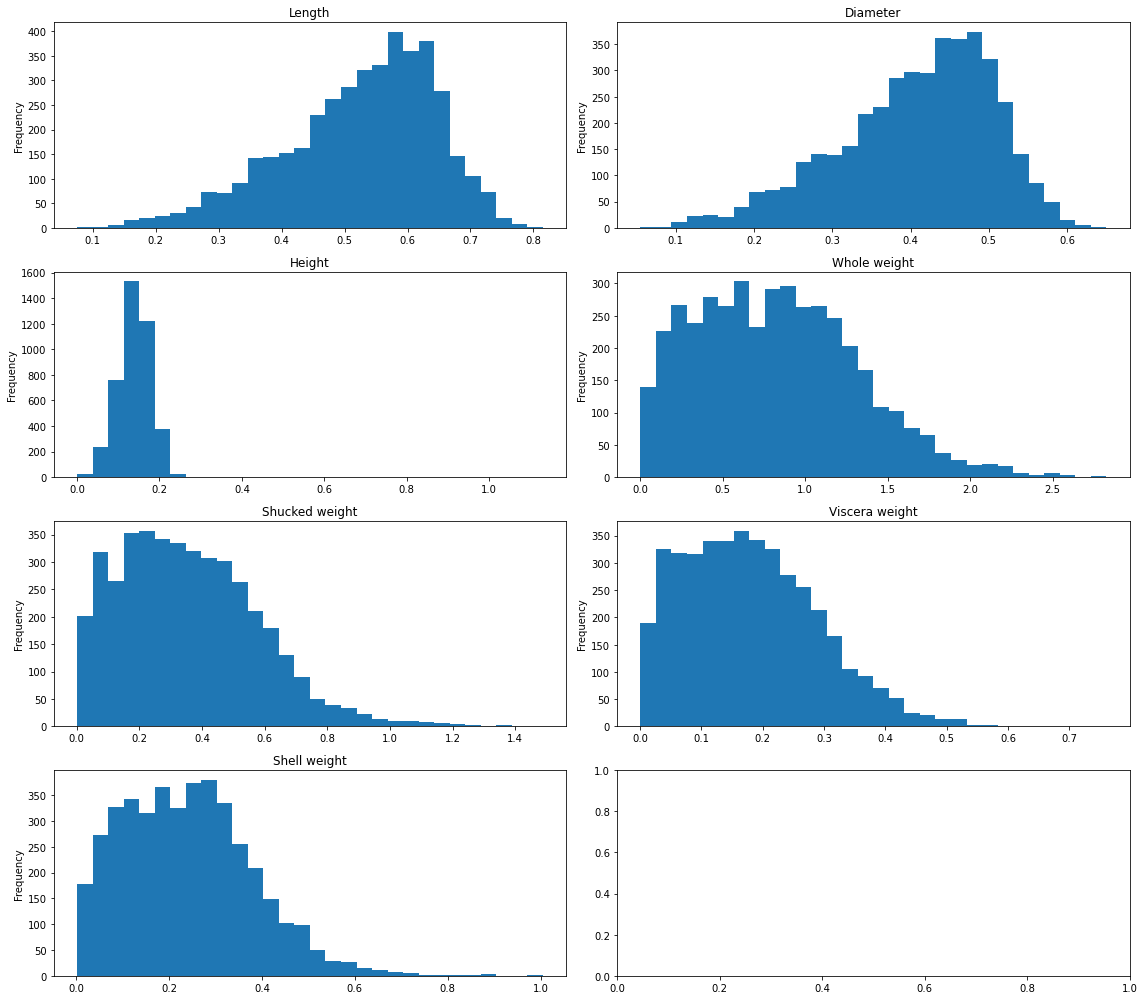

In [9]:
fig, axes = plt.subplots(4,2,figsize=(16, 14))
axes = np.ravel(axes)
for i, c in enumerate(numerical_features):
    hist = data[c].plot(kind = 'hist', ax=axes[i], title=c, bins=30)
plt.tight_layout()
plt.show()

# Finding Outliers

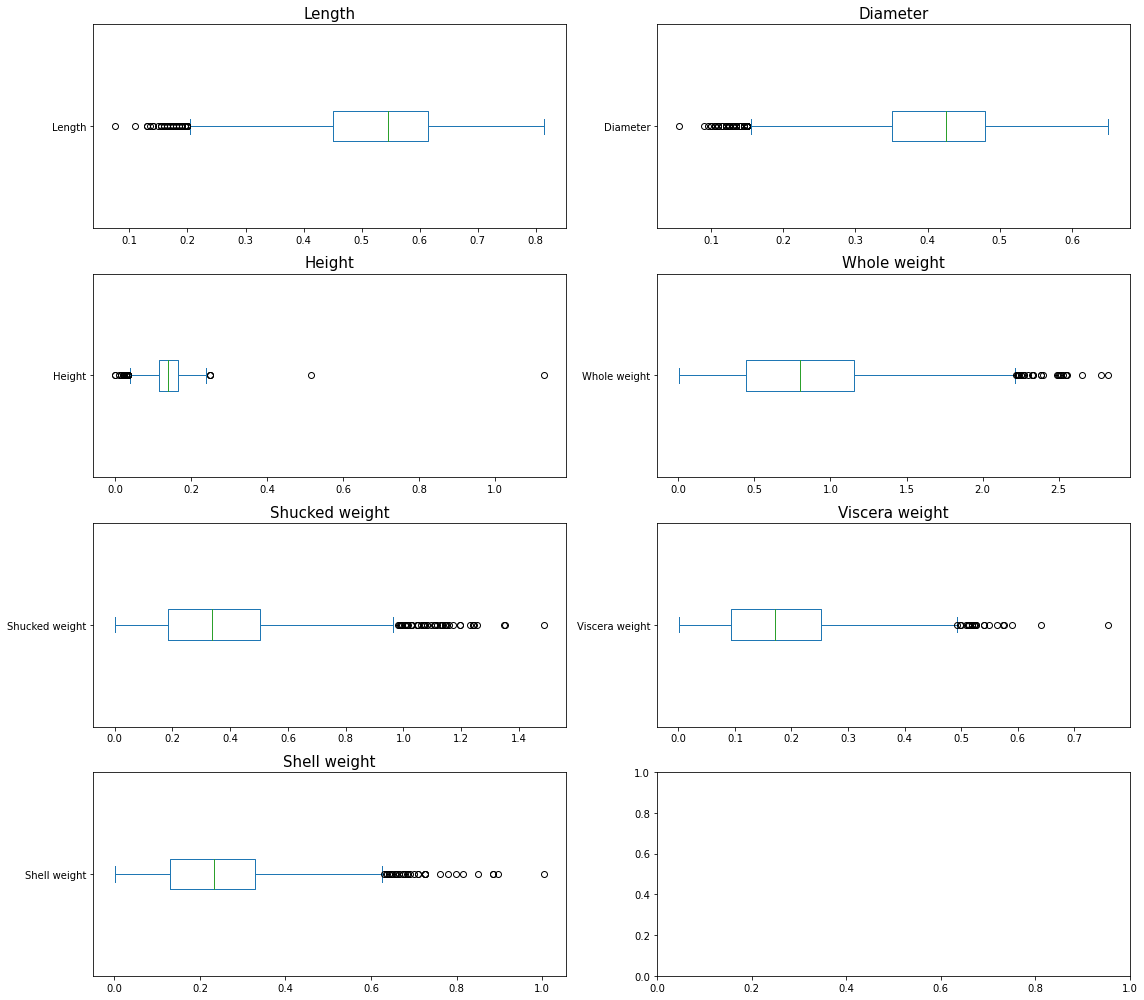

In [10]:
fig, axes = plt.subplots(4,2,figsize=(16, 14))
axes = np.ravel(axes)

for i, c in enumerate(numerical_features):
    hist = data[c].plot(kind = 'box', ax=axes[i], vert=False)
    axes[i].set_title(c, fontsize=15)
    
plt.tight_layout()
plt.show()

# Bivariate and Multivariate Analysis

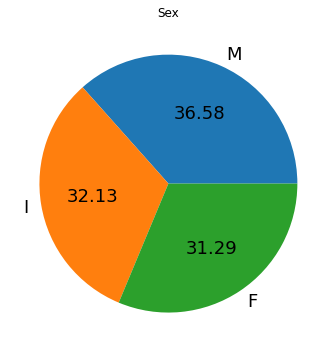

In [11]:
data[categorical_feature].value_counts(normalize=True).plot(kind='pie',figsize=(5,5),title=categorical_feature,ylabel="",autopct="%.2f",fontsize=18)
plt.tight_layout()
plt.show()

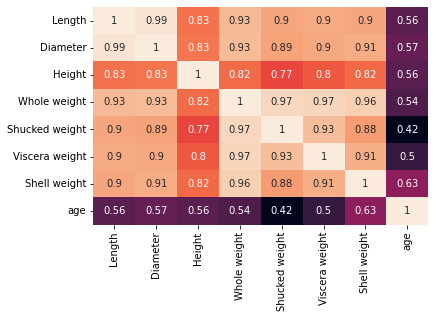

In [12]:
sns.heatmap(data.corr(method='pearson'), annot=True,cbar=False,)
plt.show()

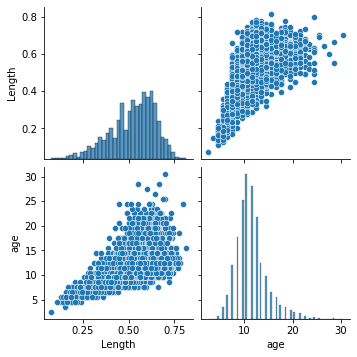

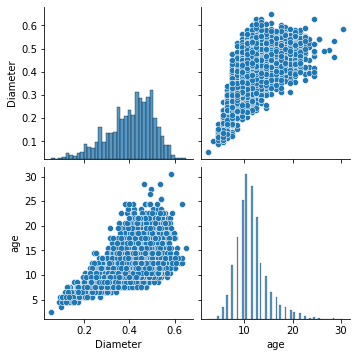

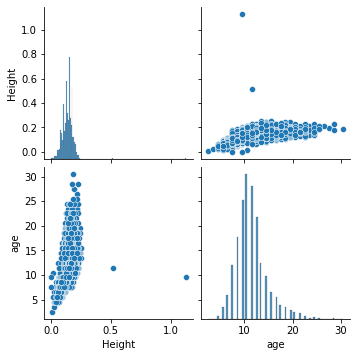

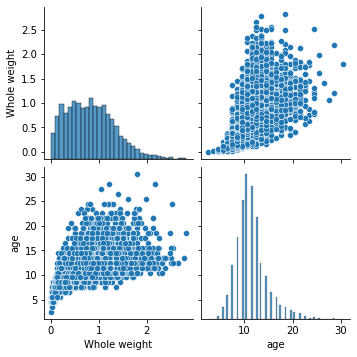

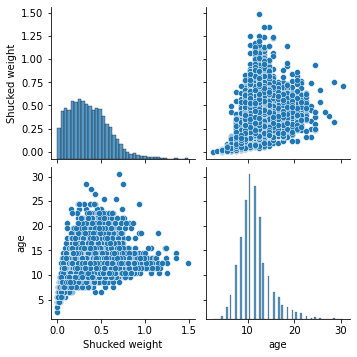

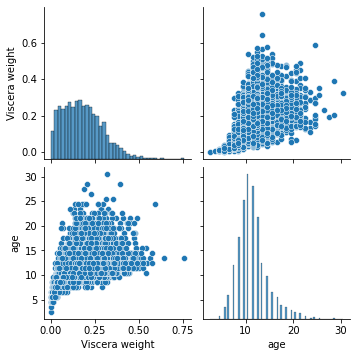

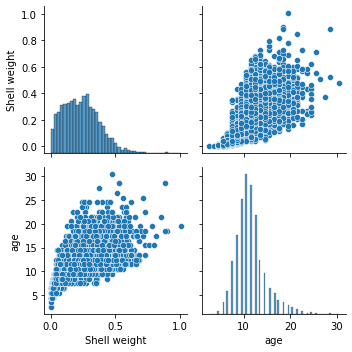

In [13]:

for i in numerical_features:
  sns.pairplot(data,vars=[i,'age'])
plt.tight_layout()
plt.show()

# Removing Outliers

In [14]:
idx = data.loc[data.Height>0.4].index
data.drop(idx, inplace=True)

idx = data.loc[data['Viscera weight']>0.6].index
data.drop(idx, inplace=True)

idx = data.loc[data[target]>25].index
data.drop(idx, inplace=True)

In [15]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


# One Hot Encoding

In [16]:
data_dummies = pd.get_dummies(data['Sex'], drop_first = True, prefix = "Sex_")
for column in data_dummies.columns:
    data[column] = data_dummies[column]

data = data.drop(columns = ['Sex'])
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age,Sex__I,Sex__M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5,1,0


# Feature Scaling

In [17]:
y = data['age'].values
data.drop('age', axis=1, inplace=True)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc = StandardScaler()
cols_to_scale = numerical_features
sc_X_train = sc.fit_transform(data[cols_to_scale])
sc_X_train = pd.DataFrame(data=sc_X_train, columns=cols_to_scale)
sc_X_train.shape
sc_X_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,-0.572214,-0.429521,-1.147329,-0.640494,-0.606567,-0.726369,-0.637015
1,-1.447614,-1.438704,-1.277568,-1.232210,-1.172526,-1.208417,-1.215823
2,0.053073,0.125530,-0.105417,-0.306180,-0.461681,-0.354503,-0.202909
3,-0.697271,-0.429521,-0.365895,-0.636392,-0.647316,-0.607004,-0.600840
4,-1.614357,-1.539622,-1.538047,-1.274256,-1.217803,-1.291054,-1.324350


In [20]:
x_data = np.concatenate((data[numerical_features].values, sc_X_train.values), axis=1)
x_data.shape

(4166, 14)

# Splitting training and testing data

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size = 0.2, random_state = 2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3332, 14), (834, 14), (3332,), (834,))

In [23]:
x_train

array([[ 0.6       ,  0.495     ,  0.175     , ...,  1.12074278,
         0.88045955,  0.7702115 ],
       [ 0.645     ,  0.495     ,  0.185     , ...,  0.76079235,
         0.90341424,  1.56968989],
       [ 0.575     ,  0.445     ,  0.135     , ...,  0.10201514,
         0.21477349,  0.15884567],
       ...,
       [ 0.565     ,  0.44      ,  0.15      , ...,  0.40310575,
         0.50859354,  0.07564204],
       [ 0.62      ,  0.46      ,  0.16      , ...,  0.6023236 ,
         0.18263692, -0.07267749],
       [ 0.54      ,  0.435     ,  0.14      , ..., -0.12889646,
        -0.18922909, -0.18120396]])

# Building the model

In [24]:
from sklearn import linear_model

In [25]:
l_reg=linear_model.LinearRegression()
model=l_reg.fit(x_train,y_train)

In [26]:
from sklearn.ensemble import RandomForestRegressor
ran_tree=RandomForestRegressor(max_features=4, n_estimators=30)
tree_model=ran_tree.fit(x_train,y_train)

# Testing the model

In [27]:
predictions=model.predict(x_test)
print("predictions",predictions[0])
print("actual value",y_test[0])

predictions 12.766464233398438
actual value 14.5


In [28]:
predictions=tree_model.predict(x_test)
print("predictions",predictions[0])
print("actual value",y_test[0])

predictions 12.333333333333334
actual value 14.5


# Model Evaluation

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
print("Train rmse : ", np.sqrt(mean_squared_error(y_train, model.predict(x_train))))
print("Test rmse : ", np.sqrt(mean_squared_error(y_test, model.predict(x_test))))

Train rmse :  2.154782076304813
Test rmse :  2.2287388797121888


In [31]:
print("Train rmse : ", np.sqrt(mean_squared_error(y_train, tree_model.predict(x_train))))
print("Test rmse : ", np.sqrt(mean_squared_error(y_test, tree_model.predict(x_test))))

Train rmse :  0.8201091583518898
Test rmse :  2.21180793120478


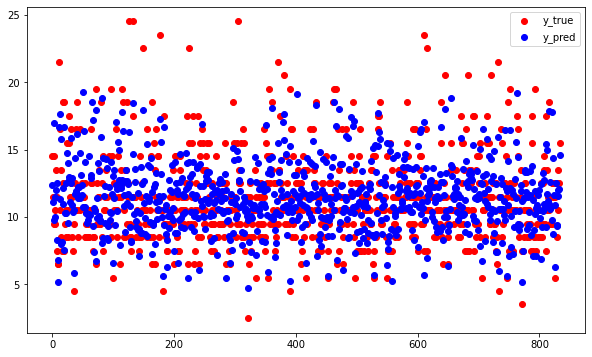

In [32]:
y_pred = tree_model.predict(x_test)

fig = plt.figure(figsize=(10, 6))
plt.scatter(range(y_test.shape[0]), y_test, color='red', label='y_true')
plt.scatter(range(y_test.shape[0]), y_pred, color='blue', label='y_pred')
plt.legend()
plt.show()

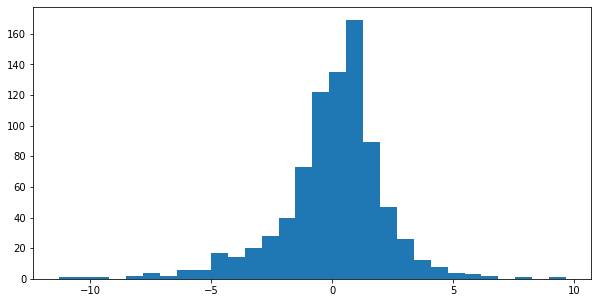

In [33]:
plt.figure(figsize=(10,5))
plt.hist(y_pred-y_test, bins=30)
plt.show()